## Clustering de Películas

#### **_Diego Leon Ortiz - Preprocesamiento de texto y Clustering_**

In [68]:
import numpy
import pandas
import nltk # Nos ayuda con varias funciones relacionadas al procesamiento de texto
import re # Regular Expressions : encontrar o hacer busqueda de texto en base a patrones
import os
import codecs
from sklearn import feature_extraction
from bs4 import BeautifulSoup

import warnings as w 
w.filterwarnings('ignore')

### Carga de datasets

In [69]:
titulos = open('title_list.txt').read().split('\n')
titulos = titulos[:100]
titulos[:5]

['The Godfather',
 'The Shawshank Redemption',
 "Schindler's List",
 'Raging Bull',
 'Casablanca']

In [70]:
sinopsis_wiki = open('synopses_list_wiki.txt',encoding='utf8').read().split('\n BREAKS HERE')
sinopsis_wiki = sinopsis_wiki[:100]
sinopsis_wiki[0][:1000]

" Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito's youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito's godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter's wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito's youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adams  , to his family at the sprawling reception. Vito's godson   John

In [71]:
# #Se limpia el codigo HTML de las synopsis, para usarlo como formato unicode:
# sinopsis_clean_wiki = []
# for texto in sinopsis_wiki:
    
#     texto = BeautifulSoup(texto, 'html.parser').getText()
    
#     #strips html formatting and converts to unicode
#     sinopsis_clean_wiki.append(texto)

# sinopsis_wiki = sinopsis_clean_wiki

In [72]:
generos = open('genres_list.txt').read().split('\n')
generos = generos[:100]
generos[:5]

["[u' Crime', u' Drama']",
 "[u' Crime', u' Drama']",
 "[u' Biography', u' Drama', u' History']",
 "[u' Biography', u' Drama', u' Sport']",
 "[u' Drama', u' Romance', u' War']"]

In [73]:
sinopsis_imdb = open('synopses_list_imdb.txt',encoding='utf8').read().split('\n BREAKS HERE')
sinopsis_imdb = sinopsis_imdb[:100]
sinopsis_imdb[0][:1000]

'\n\nIn late summer 1945, guests are gathered for the wedding reception of Don Vito Corleone\'s daughter Connie (Talia Shire) and Carlo Rizzi (Gianni Russo). Vito (Marlon Brando), the head of the Corleone Mafia family, is known to friends and associates as "Godfather." He and Tom Hagen (Robert Duvall), the Corleone family lawyer, are hearing requests for favors because, according to Italian tradition, "no Sicilian can refuse a request on his daughter\'s wedding day." One of the men who asks the Don for a favor is Amerigo Bonasera, a successful mortician and acquaintance of the Don, whose daughter was brutally beaten by two young men because she refused their advances; the men received minimal punishment. The Don is disappointed in Bonasera, who\'d avoided most contact with the Don due to Corleone\'s nefarious business dealings. The Don\'s wife is godmother to Bonasera\'s shamed daughter, a relationship the Don uses to extract new loyalty from the undertaker. The Don agrees to have his 

In [74]:
print(str(len(titulos)) + ' titulos')
print(str(len(sinopsis_wiki)) + ' sinopsis wiki')
print(str(len(sinopsis_imdb)) + ' sinopsis imdb')

100 titulos
100 sinopsis wiki
100 sinopsis imdb


In [75]:
# synopses_imdb = open('Documents_Movies/synopses_list_imdb.txt').read().split('\n BREAKS HERE')
# synopses_imdb = synopses_imdb[:100]

# synopses_clean_imdb = []
# for text in synopses_imdb:
#     text = BeautifulSoup(text, 'html.parser').getText()
#     #strips html formatting and converts to unicode
#     synopses_clean_imdb.append(text)
# synopses_imdb = synopses_clean_imdb

# synopses_imdb[0]

In [76]:
#Juntamos las descripciones de wikipedia y imdb por medio de una lista comprimida
sinopsis_totales = [wiki + imdb for wiki, imdb in zip(sinopsis_wiki, sinopsis_imdb)]

In [77]:
sinopsis_totales[0]

' Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter\'s wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito\'s youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito\'s godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter\'s wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito\'s youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adams  , to his family at the sprawling reception. Vito\'s godson 

### Preprocesamiento

En esta sección se eliminan las palabras más comunes que no aportan mayor valor al texto de sinopsis de cada película. Para esto usamos la librería `nltk` y la funcion `stopwords`

In [78]:
#Definimos una lista de stopwords : Palabras comunes en el idioma ingles que no cuentan con mucho significado relevante para el analisis
# Tambien podemos obtener las stopwords en idioma español modificando el parámetro, pero para este caso no es necesario debido a que toda la data a procesar se encuentra en idioma ingles
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [79]:
len(stopwords)

179

In [80]:
#Stemmer me permite obtener la raiz de una palabra, quitando conjugaciones para agrupar las palabras de acuerdo a su raiz 
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

In [81]:
def tokenizar(texto):
    tokens = nltk.word_tokenize(texto)
    #tokens = [word.lower() for sent in nltk.sent_tokenize(texto) for word in nltk.word_tokenize(sent)]

    #solo nos quedamos con los tokens que contengan letras en mayúsculas o minúsculas
    filtro_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtro_tokens.append(token)
    
    #filtro_tokens=[token for token in filtro_tokens if token not in stopwords] # nos quedamos con las palabras que nos sean stopwords
    
    return filtro_tokens    

In [82]:
def stemming(lista_tokens):
    stems = [stemmer.stem(token) for token in lista_tokens]
    return stems

Genero los vectores de palabras para cada sinopsis

In [83]:
vocabulario_stemmed = []
vocabulario_tokenizado = []

for sinopsis in sinopsis_totales:
    tokens = tokenizar(sinopsis)
    tokens_stemmed = stemming(tokens)
    
    vocabulario_tokenizado.extend(tokens)
    vocabulario_stemmed.extend(tokens_stemmed)

In [84]:
vocabulario = pandas.DataFrame({'words': vocabulario_tokenizado, 'stem': vocabulario_stemmed})
vocabulario.head()

,words,stem
0,Plot,plot
1,edit,edit
2,edit,edit
3,edit,edit
4,On,on


In [85]:
vocabulario.loc[vocabulario['words'].str.contains('kill')]

,words,stem
359,killed,kill
535,killed,kill
624,kill,kill
743,kill,kill
1294,kills,kill
...,...,...
307880,kill,kill
308187,killed,kill
308384,killed,kill
309686,killing,kill


In [86]:
vocabulario = vocabulario.drop_duplicates('stem')
vocabulario.query("stem == 'kill'")

,words,stem
359,killed,kill


In [87]:
vocabulario = vocabulario.set_index('stem')
vocabulario.loc['kill']

words    killed
Name: kill, dtype: object

In [88]:
vocabulario.head()

,words
stem,
plot,Plot
edit,edit
on,On
the,the
day,day


In [89]:
vocabulario.shape

(12469, 1)

In [90]:
def tokenizar_y_stemming(texto):

    tokens = tokenizar(texto)
    tokens_stemmed = stemming(tokens)
    
    return tokens_stemmed

### Vector de Características: TF-iDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

Parámetros:

`max_df`: máxima frecuencia utilizada. si el token aparece en más del 80% del documento probablemente no tenga mucho significado

`min_idf`: cantidad mínima de documentos en los que debe aparecer el token para ser considerado. En este caso 0.2 es un porcentaje de documentos pero también se puede utilizar una cantidad absoluta (5, 10 documentos)

`ngram_range`: nos permite controlar la longitud de los ngrams permitidos

In [91]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenizar_y_stemming, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(sinopsis_totales)
print(tfidf_matrix.shape)

(100, 563)


In [92]:
terms = tfidf_vectorizer.get_feature_names()
len(terms)

563

In [93]:
terms

["'d",
 "'s death",
 "'s father",
 "'s friend",
 "'s hous",
 "'s mother",
 'abandon',
 'abl',
 'accept',
 'accid',
 'accompani',
 'accus',
 'act',
 'action',
 'actual',
 'admit',
 'afterward',
 'ago',
 'agre',
 'air',
 'aliv',
 'allow',
 'alon',
 'alreadi',
 'alway',
 'american',
 'angri',
 'angrili',
 'ani',
 'announc',
 'anoth',
 'answer',
 'anyon',
 'anyth',
 'apart',
 'appar',
 'appear',
 'approach',
 'area',
 'argu',
 'arm',
 'armi',
 'arrang',
 'arrest',
 'arriv',
 'ask',
 'assign',
 'assist',
 'assum',
 'attack',
 'attempt',
 'attend',
 'attent',
 'attract',
 'audienc',
 'avoid',
 'away',
 'bad',
 'bar',
 'bare',
 'battl',
 'beat',
 'becaus',
 'becom',
 'bed',
 'beg',
 'believ',
 'best',
 'better',
 'big',
 'black',
 'blow',
 'board',
 'bodi',
 'book',
 'boss',
 'boy',
 'break',
 'brief',
 'bring',
 'broken',
 'brother',
 'build',
 'burn',
 'busi',
 'buy',
 'ca',
 "ca n't",
 'camp',
 'captain',
 'captur',
 'car',
 'care',
 'career',
 'carri',
 'case',
 'catch',
 'caus',
 'chanc'

La distancia coseno nos permite obtener una medida de similitud. Como queremos una medida de distancia la restamos de 1.

In [94]:
#Calcularemos una matriz de distancia aplicando la distancia coseno

from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(tfidf_matrix)

### K-Means

In [120]:
from sklearn.cluster import KMeans


km = KMeans(n_clusters= 5, random_state = 200)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

In [121]:
peliculas = {'ranking': range(1, 101), 'titulo': titulos, 'sinopsis': sinopsis_totales, 'cluster': clusters}
df_peliculas = pandas.DataFrame(peliculas, columns = peliculas.keys())
df_peliculas.head()

,ranking,titulo,sinopsis,cluster
0,1,The Godfather,Plot [edit] [ [ edit edit ] ] \n On ...,4
1,2,The Shawshank Redemption,Plot [edit] [ [ edit edit ] ] \n In ...,3
2,3,Schindler's List,Plot [edit] [ [ edit edit ] ] \n In ...,3
3,4,Raging Bull,Plot [edit] [ [ edit edit ] ] \n In ...,4
4,5,Casablanca,Plot [edit] [ [ edit edit ] ] \n It ...,1


In [122]:
df_peliculas.cluster.value_counts()

4    34
0    27
3    19
1    14
2     6
Name: cluster, dtype: int64

In [123]:
#El cluster con un promedio de ranking menor contiene a las mejores peliculas, recordando que el ranking inicia de forma ascendente (1..100), mientras menor numero en el ranking, mayor preferencia y gusto por los usuarios 
df_peliculas.groupby('cluster').mean()

,ranking
cluster,
0,55.037037
1,38.214286
2,53.833333
3,45.684211
4,54.058824


## Palabras clave por cluster

Recordar que los features de cada sinopsis son las frecuencias de cada término (tf-idf). Vamos a extraer los tokens que tienen mayor frecuencia dentro de cada centroide obtenido

In [124]:
km.cluster_centers_

array([[0.01236697, 0.01174403, 0.0202017 , ..., 0.0234829 , 0.04454021,
        0.01262304],
       [0.00608611, 0.00855525, 0.        , ..., 0.        , 0.02348749,
        0.00249102],
       [0.0008594 , 0.00573197, 0.03574592, ..., 0.05112355, 0.00302882,
        0.004863  ],
       [0.00834219, 0.00863925, 0.00173151, ..., 0.00407257, 0.01454414,
        0.00429856],
       [0.01178123, 0.01620018, 0.00957778, ..., 0.05424295, 0.02020077,
        0.00806185]])

In [125]:
km.cluster_centers_.shape

(5, 563)

In [126]:
len(terms)

563

In [127]:
terms[:10]

["'d",
 "'s death",
 "'s father",
 "'s friend",
 "'s hous",
 "'s mother",
 'abandon',
 'abl',
 'accept',
 'accid']

In [128]:
#Creamos un dataframe con el valor promedio del uso de cada palabra en determinado token 
df_centroids = pandas.DataFrame(km.cluster_centers_.T, index = terms)
df_centroids

,0,1,2,3,4
'd,0.012367,0.006086,0.000859,0.008342,0.011781
's death,0.011744,0.008555,0.005732,0.008639,0.016200
's father,0.020202,0.000000,0.035746,0.001732,0.009578
's friend,0.017152,0.008466,0.020354,0.010861,0.007944
's hous,0.014079,0.003254,0.001779,0.003142,0.013167
...,...,...,...,...,...
wrong,0.011240,0.001246,0.013940,0.013652,0.009845
year,0.050275,0.010848,0.010526,0.018272,0.027657
york,0.023483,0.000000,0.051124,0.004073,0.054243
young,0.044540,0.023487,0.003029,0.014544,0.020201


10 palabras más comunes en cluster 0

In [129]:
df_centroids[0].nlargest(10)

father    0.083936
home      0.076540
love      0.069292
film      0.068818
mother    0.068166
hous      0.067564
famili    0.064756
war       0.062680
marri     0.060208
day       0.057224
Name: 0, dtype: float64

In [130]:
top_10 = df_centroids[0].nlargest(10).index
top_10

Index(['father', 'home', 'love', 'film', 'mother', 'hous', 'famili', 'war',
       'marri', 'day'],
      dtype='object')

In [131]:
vocabulario.loc[top_10]

,words
father,father
home,home
love,love
film,film
mother,mother
hous,house
famili,family
war,War
marri,marries
day,day


In [132]:
print('Palabras clave en cada cluster\n')

for cluster in range(5):

    print('----------------------------------------------------------------------')
    print(f'Cluster {cluster} palabras: ')
    
    palabras_stem =  df_centroids[cluster].nlargest(10).index
    palabras_originales = vocabulario.loc[palabras_stem]['words'].values
    print(', '.join(palabras_originales), '\n')
    
    print('Películas de cluster')
    peliculas = df_peliculas.query(f'cluster == {cluster}')['titulo'].values
    print(', '.join(peliculas),)
    print('----------------------------------------------------------------------')

Palabras clave en cada cluster

----------------------------------------------------------------------
Cluster 0 palabras: 
father, home, love, film, mother, house, family, War, marries, day 

Películas de cluster
Gone with the Wind, Citizen Kane, Forrest Gump, E.T. the Extra-Terrestrial, Singin' in the Rain, Amadeus, Gandhi, A Streetcar Named Desire, To Kill a Mockingbird, The Best Years of Our Lives, My Fair Lady, Ben-Hur, Doctor Zhivago, Braveheart, The Exorcist, City Lights, Midnight Cowboy, Out of Africa, Good Will Hunting, Terms of Endearment, Giant, The Green Mile, Network, Nashville, The Graduate, Wuthering Heights, Yankee Doodle Dandy
----------------------------------------------------------------------
----------------------------------------------------------------------
Cluster 1 palabras: 
soldiers, general, command, killed, Captain, orders, Army, men, War, office 

Películas de cluster
Casablanca, Lawrence of Arabia, The Sound of Music, The Bridge on the River Kwai, Dr. 

## Visualizando las palabras clave en una película

In [133]:
from wordcloud import WordCloud
from collections import Counter

import matplotlib.pyplot as plt

In [134]:
tokens = tokenizar(sinopsis_totales[0])
tokens = [token for token in tokens if token not in stopwords]
tokens = stemming(tokens)

In [135]:
Counter(tokens).most_common(20)

[("'s", 97),
 ('michael', 90),
 ('don', 49),
 ('famili', 49),
 ('corleon', 44),
 ('sonni', 43),
 ('vito', 36),
 ('carlo', 31),
 ('sollozzo', 26),
 ('conni', 25),
 ('kill', 24),
 ('meet', 24),
 ('hagen', 20),
 ('kay', 19),
 ('the', 19),
 ('son', 18),
 ('father', 18),
 ('tattaglia', 16),
 ('green', 16),
 ('barzini', 16)]

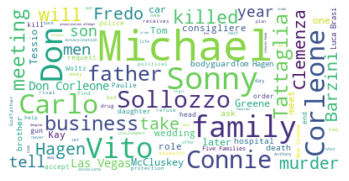

In [136]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(sinopsis_totales[0])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Visualizando los clusters

In [137]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'car, killed, police, father',
                 1: 'family, prison, New, Police',
                 2: 'soldiers, Army, command, killed', 
                 3: 'George, marries, woman, family', 
                 4: 'War, home, marries, family'}

In [138]:
%matplotlib inline

Reduciendo las dimensiones con MDS (para plotear 2):

In [139]:
import os  # for os.path.basename
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS

MDS() # nos permitira reducir las 563 variables que teniamos en solo 2 

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
xs, ys = pos[:, 0], pos[:, 1]

In [140]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pandas.DataFrame(dict(x=xs, y=ys, label=clusters, title=titulos)) 

#group by cluster
groups = df.groupby('label')

#### **_Visualizaremos un gráfico que, en base a las palabras claves, agrupamos las peliculas_**

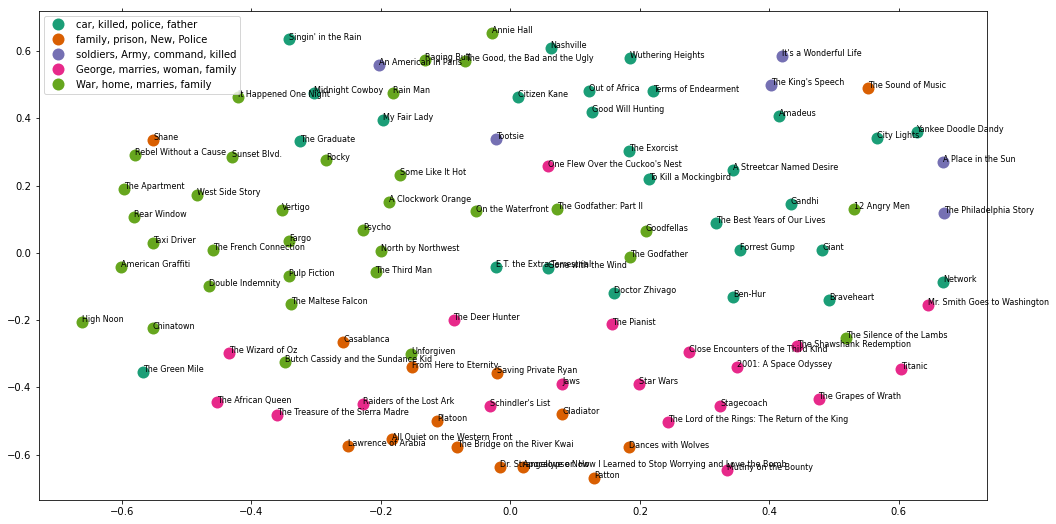

<Figure size 432x288 with 0 Axes>

In [142]:
fig, ax = plt.subplots(figsize=(17, 9)) 
ax.margins(0.05) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',      
        bottom='off',      
        top='off',         
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         
        which='both',      
        left='off',      
        top='off',       
        labelleft='off')
    
ax.legend(numpoints=1)  

for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  


plt.show() 
plt.savefig('KMeans.png', dpi=300)

### Hierarchical

### **_Al usar un dendograma obtenemos un grafico que nos indica como se van agrupando las peliculas en base a su similitud_**

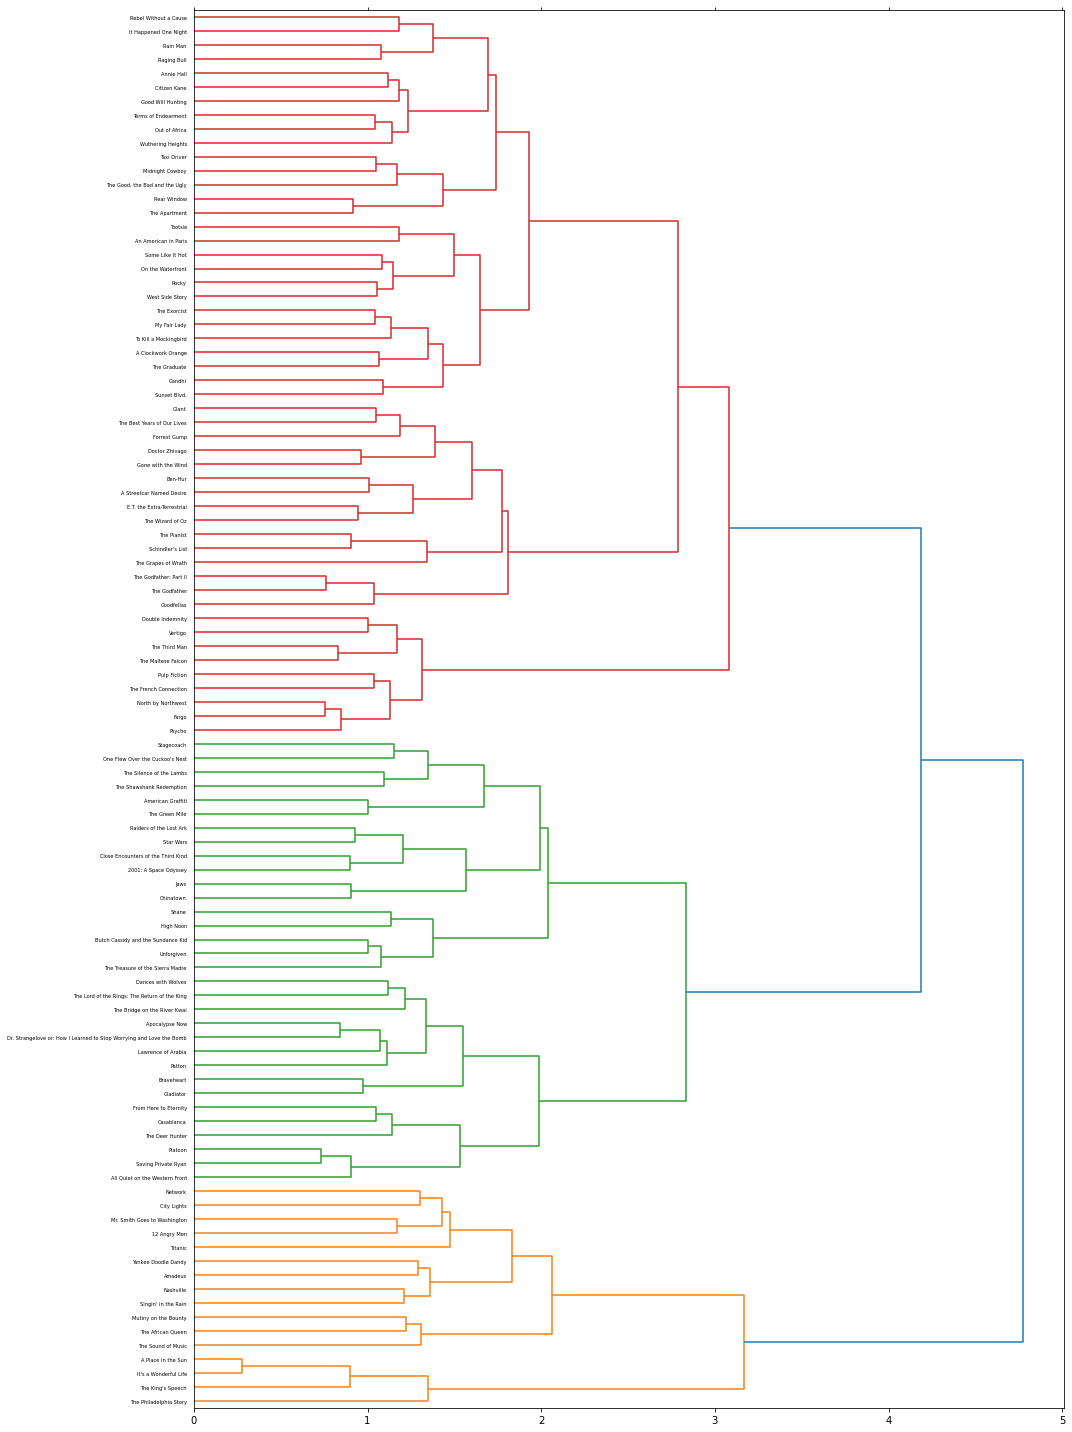

In [143]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) 

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titulos);

plt.tick_params(\
    axis= 'x',          
    which='both',      
    bottom='off',      
    top='off',         
    labelbottom='off')

plt.tight_layout() 
plt.savefig('hierarchical.png', dpi=300) 